In [135]:
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Construct our model by instantiating the class defined above
model = Polynomial3()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined
# with torch.nn.Parameter) which are members of the model.


In [136]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
# for t in range(2000):
#     # Forward pass: Compute predicted y by passing x to the model
#     y_pred = model(x)

#     # Compute and print loss
#     loss = criterion(y_pred, y)
#     if t % 100 == 99:
#         print(t, loss.item())

#     # Zero gradients, perform a backward pass, and update the weights.
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

# print(f'Result: {model.string()}')

In [134]:
sss = torch.tensor([[1., -1.], [1., -1.]])

In [ ]:
sss

In [137]:
y_pred = model(x)

In [139]:
y_pred , y_pred.shape

(tensor([ 30.2819,  30.1955,  30.1092,  ..., -31.7172, -31.8123, -31.9075],
        grad_fn=<AddBackward0>),
 torch.Size([2000]))

In [140]:
loss = criterion(y_pred, y)

In [113]:
loss

tensor(195237.6250, grad_fn=<MseLossBackward0>)

In [144]:
x ,x.shape

(tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416]),
 torch.Size([2000]))

In [141]:
for s in model.parameters():
    print(s , s.grad)

Parameter containing:
tensor(1.3872, requires_grad=True) None
Parameter containing:
tensor(-0.3813, requires_grad=True) None
Parameter containing:
tensor(-0.2229, requires_grad=True) None
Parameter containing:
tensor(-0.9642, requires_grad=True) None


In [142]:
optimizer.zero_grad()

In [116]:
for s in model.parameters():
    print(s , s.grad)

Parameter containing:
tensor(0.5441, requires_grad=True) None
Parameter containing:
tensor(1.8463, requires_grad=True) None
Parameter containing:
tensor(-0.3903, requires_grad=True) None
Parameter containing:
tensor(0.5979, requires_grad=True) None


In [117]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 1e-06
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [118]:
loss.backward()

In [119]:
for s in model.parameters():
    print(s , s.grad)

Parameter containing:
tensor(0.5441, requires_grad=True) tensor(-2964.8860)
Parameter containing:
tensor(1.8463, requires_grad=True) tensor(67006.8906)
Parameter containing:
tensor(-0.3903, requires_grad=True) tensor(-23309.1660)
Parameter containing:
tensor(0.5979, requires_grad=True) tensor(458134.0312)


In [120]:
loss

tensor(195237.6250, grad_fn=<MseLossBackward0>)

In [121]:
optimizer.step()

In [122]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 1e-06
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [123]:
for s in model.parameters():
    print(s , s.grad)

Parameter containing:
tensor(0.5471, requires_grad=True) tensor(-2964.8860)
Parameter containing:
tensor(1.7793, requires_grad=True) tensor(67006.8906)
Parameter containing:
tensor(-0.3670, requires_grad=True) tensor(-23309.1660)
Parameter containing:
tensor(0.1397, requires_grad=True) tensor(458134.0312)


In [124]:
optimizer.zero_grad()

In [125]:
for s in model.parameters():
    print(s , s.grad)

Parameter containing:
tensor(0.5471, requires_grad=True) tensor(0.)
Parameter containing:
tensor(1.7793, requires_grad=True) tensor(0.)
Parameter containing:
tensor(-0.3670, requires_grad=True) tensor(0.)
Parameter containing:
tensor(0.1397, requires_grad=True) tensor(0.)


In [131]:
print(x.requires_grad_())

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416],
       requires_grad=True)


In [12]:
y_pred = model(x)

     # Compute and print loss
loss = criterion(y_pred, y)

In [13]:
loss

tensor(61746.3789, grad_fn=<MseLossBackward0>)

In [33]:
x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)


In [34]:
out = x.pow(2).sum()


In [35]:
out

tensor(4., grad_fn=<SumBackward0>)

In [36]:
out.backward()


In [37]:
x.grad

tensor([[ 2., -2.],
        [ 2.,  2.]])

In [145]:
import numpy as np

In [153]:
arr = np.random.rand(6)

In [154]:
arr , arr.shape

(array([0.85407667, 0.52763295, 0.47866328, 0.89314275, 0.80744554,
        0.0468233 ]),
 (6,))

In [156]:
arr.resize((3,2))

In [157]:
arr

array([[0.85407667, 0.52763295],
       [0.47866328, 0.89314275],
       [0.80744554, 0.0468233 ]])

In [158]:
arr = np.expand_dims(arr, axis=2)

In [159]:
arr

array([[[0.85407667],
        [0.52763295]],

       [[0.47866328],
        [0.89314275]],

       [[0.80744554],
        [0.0468233 ]]])

In [160]:
arr.shape


(3, 2, 1)

In [161]:
def expand_by_mirroring(image_train_raw,
                        len_row, 
                        len_col,
                        half_len):

    """ 
# For testing,
    1. expand left and up side by GLOBAL['len_Unet_tile']/4.
    2. expand right and button side by "residue + GLOBAL['len_Unet_tile']/4", where residue equals "GLOBAL['len_Unet_tile'] - len_row%GLOBAL['len_Unet_tile']"

"""
    len_img_tile = 4*half_len
    if len_row%len_img_tile == 0:
        row_expand = np.int(len_row + 0.5 * len_img_tile)
        col_expand = np.int(len_col + 0.5 * len_img_tile)        
    else:
        row_expand = np.int(len_row + 1.5 * len_img_tile - len_row%len_img_tile)
        col_expand = np.int(len_col + 1.5 * len_img_tile - len_col%len_img_tile)
    
    img_expand = np.uint8(np.zeros([row_expand, col_expand, 3]))

    

    if len_row%len_img_tile == 0:
        img_expand[half_len:half_len + len_row, half_len : half_len + len_col, :] = image_train_raw  
        img_expand[:half_len, :, :] = np.flipud(img_expand[half_len : 2 * half_len, :, :])
        img_expand[half_len + len_row:row_expand, :, :] = np.flipud(img_expand[half_len + len_row - half_len:half_len + len_row, :, :])
        img_expand[:, :half_len, :] = np.fliplr(img_expand[:, half_len :  2 * half_len, :])
        img_expand[:, half_len + len_col:col_expand, :] = np.fliplr(img_expand[:, half_len + len_col - half_len:half_len + len_col, :])    
         
    else:
        img_expand[half_len:half_len + len_row, half_len : half_len + len_col, :] = image_train_raw  
        img_expand[:half_len, :, :] = np.flipud(img_expand[half_len : 2 * half_len, :, :])
        img_expand[half_len + len_row:row_expand, :, :] = np.flipud(img_expand[half_len + len_row - (5 * half_len - len_row%len_img_tile):half_len + len_row, :, :])
        img_expand[:, :half_len, :] = np.fliplr(img_expand[:, half_len :  2 * half_len, :])
        img_expand[:, half_len + len_col:col_expand, :] = np.fliplr(img_expand[:, half_len + len_col - (5 * half_len - len_col%len_img_tile):half_len + len_col, :])    
        
    return img_expand

In [162]:
from PIL import Image

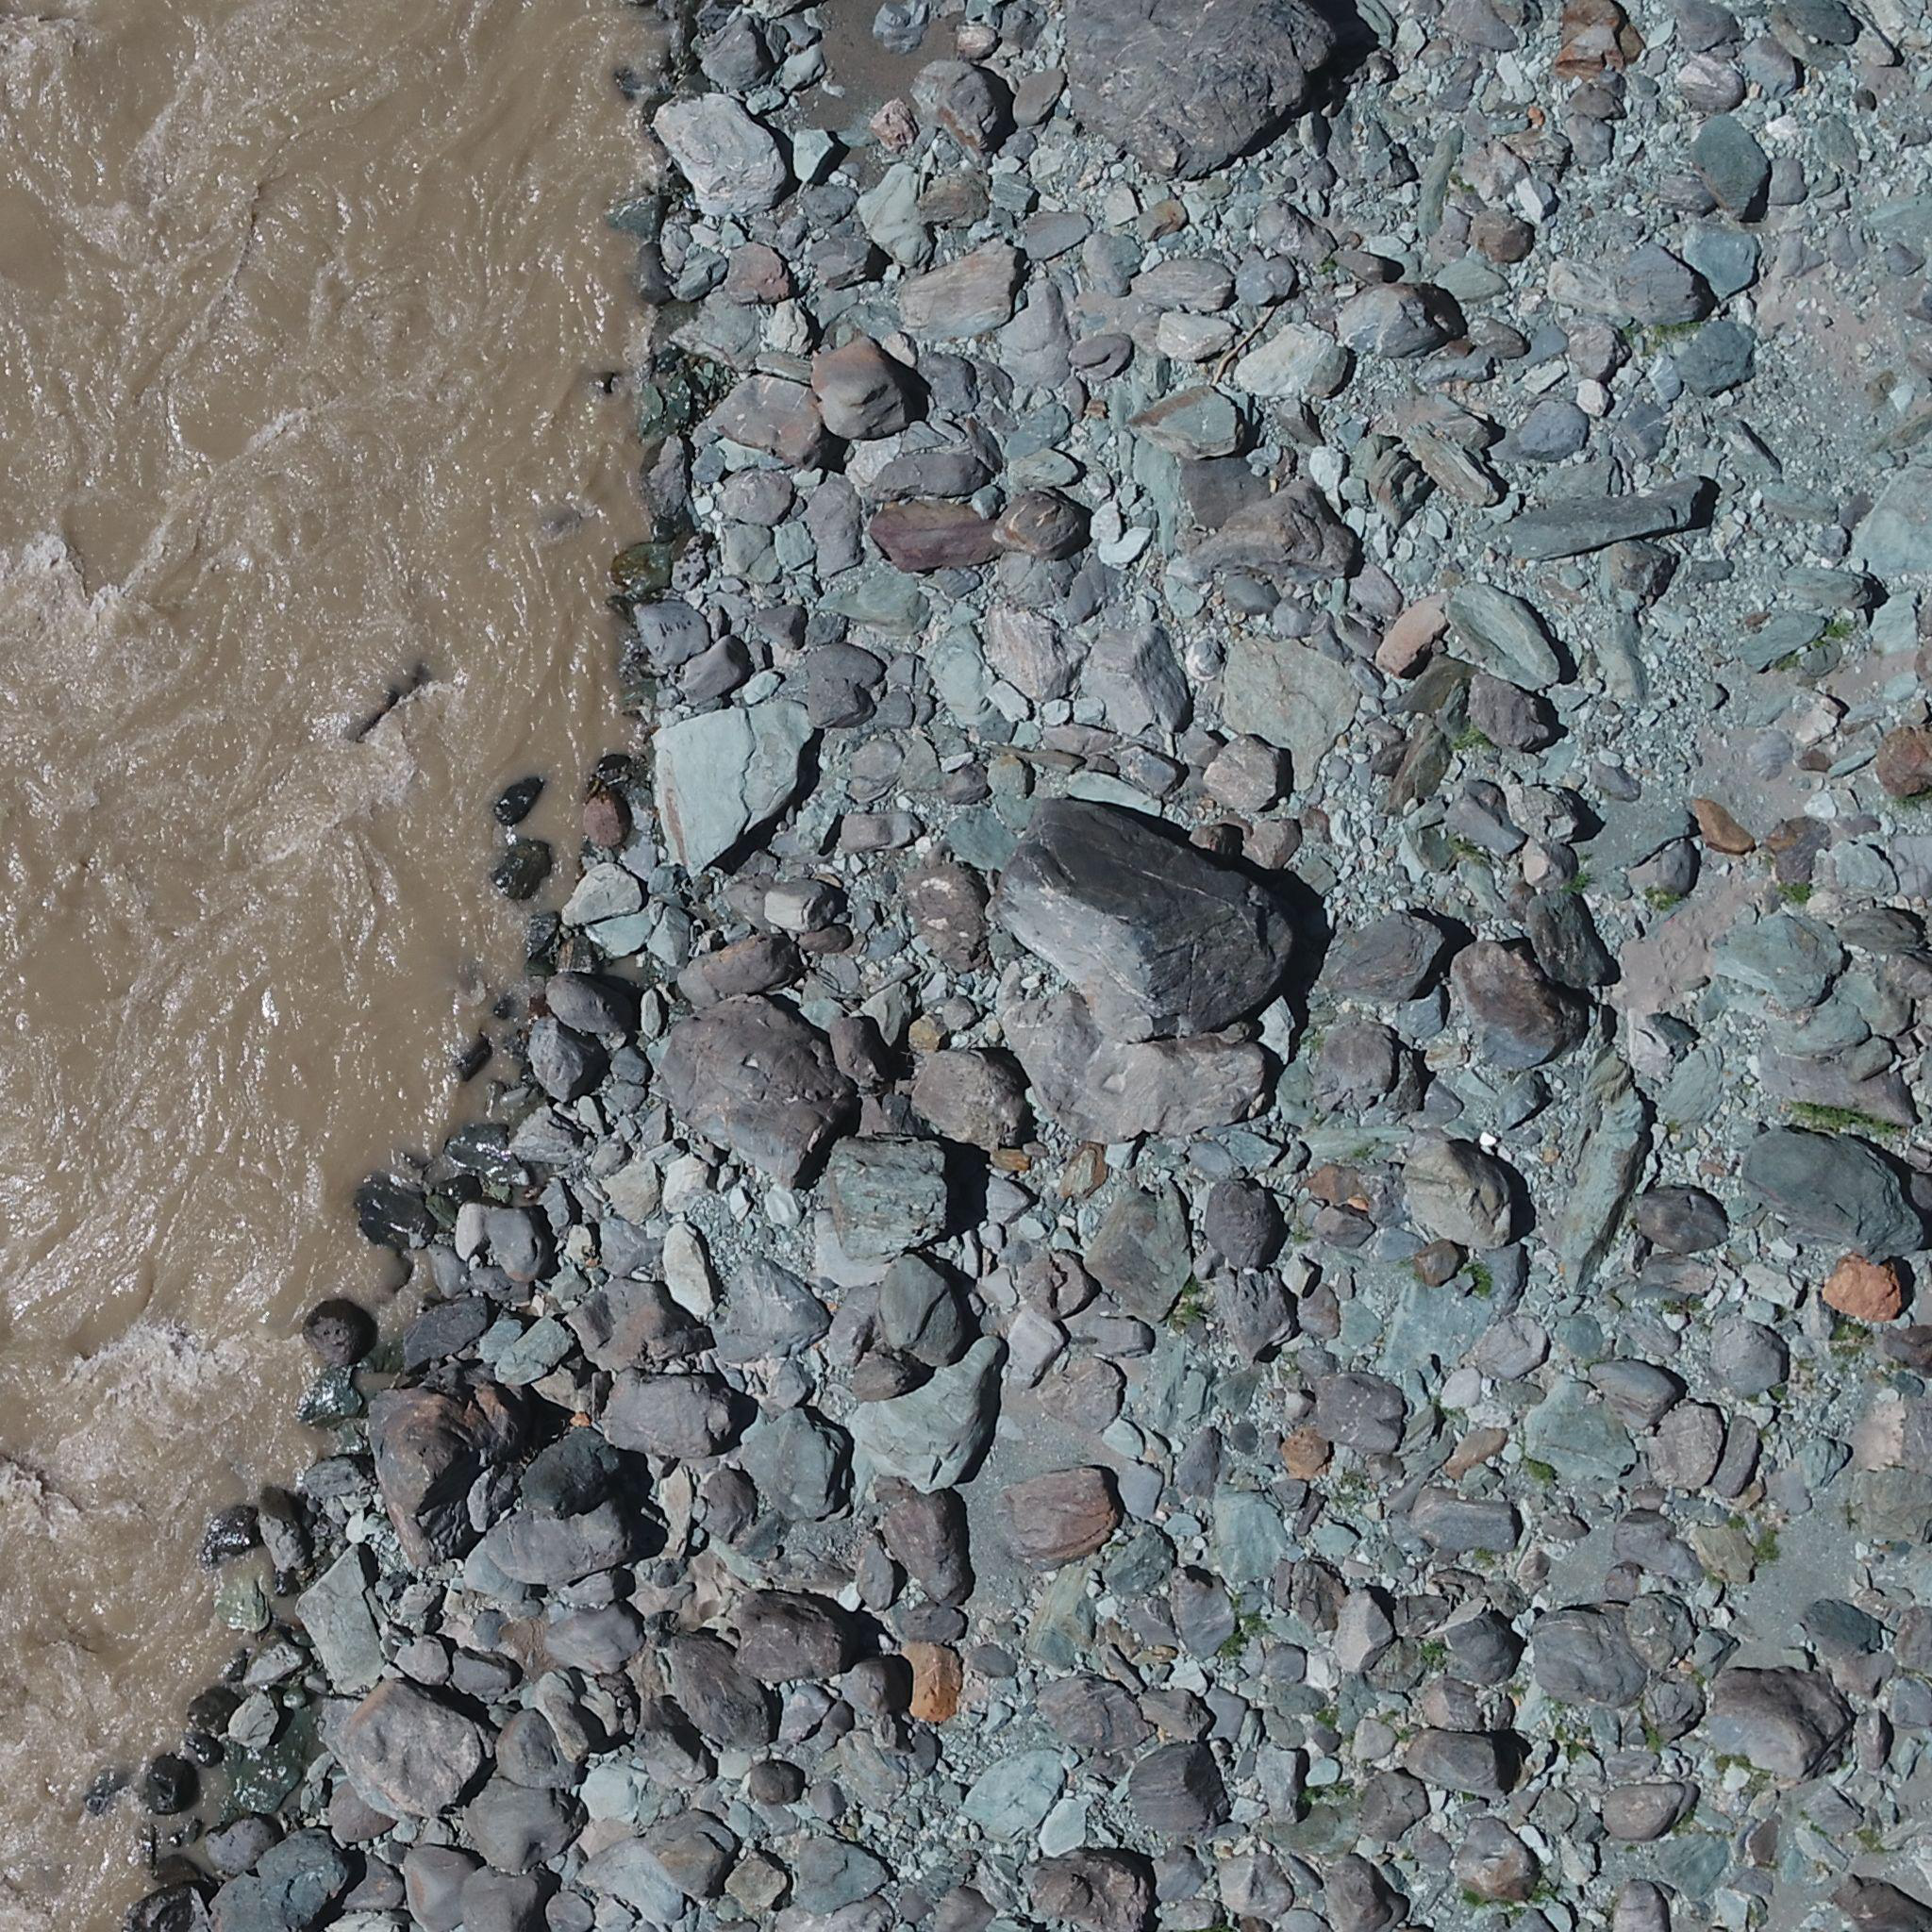

In [163]:
Image.open("img.jpg")

In [164]:
arr = np.array(Image.open("img.jpg"))

In [165]:
arr.shape

(2048, 2048, 3)

In [166]:
len_row_raw = len(arr[:,1,1])
len_col_raw = len(arr[1,:,1])

In [167]:
len_row_raw

2048

In [168]:
len_col_raw

2048

In [180]:
new_arr = expand_by_mirroring(arr , len_row_raw ,len_col_raw , 256//4)

C:\Users\hp\AppData\Local\Temp\ipykernel_19188\1792062903.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_expand = np.int(len_row + 0.5 * len_img_tile)
C:\Users\hp\AppData\Local\Temp\ipykernel_19188\1792062903.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

In [181]:
Image.fromarray(new_arr).show()

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.device_count()

1

In [5]:
torch.cuda.get_device_name(0)


'NVIDIA GeForce GTX 1050'

In [8]:
import PIL

In [9]:
import matplotlib.pyplot as plt

In [22]:
x = np.random.randint((2,2 , 3 ,1 ,1, 1), high = 255 )

In [23]:
x = np.resize(x , (3,2))

In [24]:
x

array([[119, 202],
       [ 39, 194],
       [ 42, 119]])

In [25]:
x = x/255

In [26]:
x

array([[0.46666667, 0.79215686],
       [0.15294118, 0.76078431],
       [0.16470588, 0.46666667]])

In [122]:
import torch 
from torch.nn.functional import binary_cross_entropy

In [134]:
t = torch.rand((2,1,1))

In [135]:
t

tensor([[[0.8363]],

        [[0.8560]]])

In [136]:
t2 = torch.ones((2,1,1))

In [137]:
t2

tensor([[[1.]],

        [[1.]]])

In [138]:
xx = binary_cross_entropy(t ,t2)

In [139]:
xx

tensor(0.1671)

In [84]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
loss = cross_entropy(input, target)

In [85]:
loss

tensor(-0.3331, grad_fn=<DivBackward1>)

In [86]:
input.shape

torch.Size([3, 5])

In [94]:
input

tensor([[ 1.5621, -1.0780,  0.6887,  0.0224,  0.1592],
        [ 0.0351,  0.3306,  0.2912, -0.3688,  0.0362],
        [ 0.0924,  2.5378, -0.4742, -0.8025,  1.3415]], requires_grad=True)

In [87]:
target

tensor([[-0.4399,  1.5029,  0.5246, -1.0491,  1.8255],
        [-0.1724, -0.6521,  1.0478, -0.1338, -1.2961],
        [-1.2038,  1.5510, -0.8904, -0.4078,  0.9783]])

In [56]:
loss

tensor(1.5610, grad_fn=<DivBackward1>)

In [1]:
import numpy as np

In [8]:
window = 32

In [9]:
nodes_indexes = np.arange(window*window).reshape(window,window)
nodes_indexes_h = np.vstack([nodes_indexes[:,:-1].ravel(), nodes_indexes[:,1:].ravel()]).tolist()
nodes_indexes_v = np.vstack([nodes_indexes[:-1,:].ravel(), nodes_indexes[1:,:].ravel()]).tolist()
nodes_indexes = np.hstack([nodes_indexes_h, nodes_indexes_v])
nodes_indexes = np.uint64(nodes_indexes)

In [10]:
nodes_indexes

array([[   0,    1,    2, ...,  989,  990,  991],
       [   1,    2,    3, ..., 1021, 1022, 1023]], dtype=uint64)

In [1]:
!pip install malis

  Using cached malis-1.0.tar.gz (7.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for malis
Failed to build malis
  Running setup.py install for malis: started
  Running setup.py install for malis: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\malis
      copying malis\setup.py -> build\lib.win-amd64-cpython-310\malis
      copying malis\test_malis.py -> build\lib.win-amd64-cpython-310\malis
      copying malis\__init__.py -> build\lib.win-amd64-cpython-310\malis
      running build_ext
      cythoning malis/malis.pyx to malis\malis.cpp
      D:\anaconda\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\hp\AppData\Local\Temp\pip-install-fvkuucdx\malis_a60a18c5cfd148a7880d644605932b63\malis\malis.pyx
        tree = Parsing.p_module(s, pxd, full_module_name)
      building 'mali

In [5]:
py -m easy_install malis

SyntaxError: invalid syntax (1271896228.py, line 1)

In [1]:
from platform import python_version

print(python_version())

3.7.10


In [2]:
import malis as m


D:\anaconda\envs\malis\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\malis\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\malis\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\malis\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type

In [3]:
m.pairs_cython.malis_loss_weights

<function malis.pairs_cython.malis_loss_weights>

In [4]:
import numpy as np


In [5]:
np.__version__

'1.21.5'

In [6]:
import torch

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}")

Using device cuda


In [8]:
torch.cuda.is_available()

True

In [9]:
torch.cuda.device_count()

1

In [10]:
torch.cuda.current_device()

0

In [11]:
torch.cuda.device(0)

In [12]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1050'

In [13]:
print('Memory Usage:')
print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [16]:
import sys

In [20]:
sys.path.insert('/Scripts')

TypeError: insert() takes exactly 2 arguments (1 given)

In [21]:
from Convs_Unet import UNet

In [ ]:
model = UNet(n_channels = 3 , n_classes = 1)
print("Loading Unet model")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}")
model.to(device=device)
model.load_state_dict(torch.load("./Tiles_512_Sigmod6CT_ep150.pth", map_location=device))
print("model loaded")

In [1]:
import torch
from torch import nn
import malis as m
from scipy.ndimage.morphology import binary_dilation as bind
from skimage import measure
import numpy as np

ModuleNotFoundError: No module named 'malis'

In [3]:
#pip install malis

  Using cached malis-1.0.tar.gz (7.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for malis
Failed to build malis
  Running setup.py install for malis: started
  Running setup.py install for malis: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [23 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-37
  creating build\lib.win-amd64-cpython-37\malis
  copying malis\setup.py -> build\lib.win-amd64-cpython-37\malis
  copying malis\test_malis.py -> build\lib.win-amd64-cpython-37\malis
  copying malis\__init__.py -> build\lib.win-amd64-cpython-37\malis
  running build_ext
  cythoning malis/malis.pyx to malis\malis.cpp
  D:\anaconda\envs\malis\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\hp\AppData\Local\Temp\pip-install-_92hmbq7\malis_6cc49dbe50d8441a9aa94e4b827b1db4\malis\malis.pyx
    tree = Parsing.p_module(s, pxd, full_module_name)
  building 'malis.malis' extension
  creating build\temp.win-amd64-cpyt

In [474]:
import torch
from torch import nn
import malis as m
from scipy.ndimage.morphology import binary_dilation as bind
#from skimage import measure
import numpy as np



In [475]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from skimage import measure

In [485]:
class MALISLoss_window_pos(nn.Module):

    def __init__(self, ignore_index=255):
        super().__init__()
        self.ignore_index = ignore_index

    #malis_lr: negative learning rate. To insentivate conections (bigger the more connectivity)
    #malis_lr _pos: positive learning rate. To get rid off false possitives.
    def forward(self, pred, target, malis_lr, malis_lr_pos, weights=None):
        pred_np_full = pred.cpu().detach().numpy()
        target_np_full = target.cpu().detach().numpy()
        B,C,H,W = pred_np_full.shape
        print(B,C,H,W)
        weights_n = np.zeros(pred_np_full.shape)
        weights_p = np.zeros(pred_np_full.shape)
        window = 64
        #print(pred , 20 -pred)
        for k in range(H // window):
            for j in range(W // window):
                #print(k,j)
                pred_np = pred_np_full[:,:,k*window:(k+1)*window,j*window:(j+1)*window]
                target_np = target_np_full[:,:,k*window:(k+1)*window,j*window:(j+1)*window]

                nodes_indexes = np.arange(window*window).reshape(window,window)
                nodes_indexes_h = np.vstack([nodes_indexes[:,:-1].ravel(), nodes_indexes[:,1:].ravel()]).tolist()
                nodes_indexes_v = np.vstack([nodes_indexes[:-1,:].ravel(), nodes_indexes[1:,:].ravel()]).tolist()
                nodes_indexes = np.hstack([nodes_indexes_h, nodes_indexes_v])
                nodes_indexes = np.uint64(nodes_indexes)

                costs_h = (pred_np[:,:,:,:-1] + pred_np[:,:,:,1:]).reshape(B,-1)
                costs_v = (pred_np[:,:,:-1,:] + pred_np[:,:,1:,:]).reshape(B,-1)
                costs = np.hstack([costs_h, costs_v])
                costs = np.float32(costs)

                gtcosts_h = (target_np[:,:,:,:-1] + target_np[:,:,:,1:]).reshape(B,-1)
                gtcosts_v = (target_np[:,:,:-1,:] + target_np[:,:,1:,:]).reshape(B,-1)
                gtcosts = np.hstack([gtcosts_h, gtcosts_v])
                gtcosts = np.float32(gtcosts)
                #print(np.unique(gtcosts, return_counts=True))
                costs_n = costs.copy()
                costs_p = costs.copy()
                #print(costs_n[0].shape , costs_p[0].shape)
                ## Depending on your clip values the next three lines are defined -- (paper clipping was 20)
                costs_n[gtcosts > 35] = 35
                costs_p[gtcosts < 1] = 0
                gtcosts[gtcosts > 35] = 35
                #print(np.unique(costs_n[0], return_counts=True))
                for i in range(len(pred_np)):
                    sg_gt = measure.label(bind((target_np[i,0] == 0), iterations=5)==0)
                    #print(np.unique(costs_n[i], return_counts=True) )
                    edge_weights_n = m.malis_loss_weights(sg_gt.astype(np.uint64).flatten(), nodes_indexes[0], \
                                           nodes_indexes[1], costs_n[i], 0)

                    edge_weights_p = m.malis_loss_weights(sg_gt.astype(np.uint64).flatten(), nodes_indexes[0], \
                                           nodes_indexes[1], costs_p[i], 1)
                    
#                     if (True in (target_np[i,0] == 0) and False in (target_np[i,0] == 0)) or False:
#                         ii = (bind((target_np[i,0] == 0), iterations=5)==0)*255
#                         print( i ,ii)
#                         print(PIL.Image.fromarray(ii).convert("RGB").save("./Test_outputs/" + str(k)+"_" + str(j)+"_" + str(i) + ".png")  )
#                         print(np.unique(edge_weights_n, return_counts=True) )
                    #if len(np.unique(costs_n[i], return_counts=False)) >= 2 :
                    #    print(np.unique(edge_weights_n, return_counts=True) )
                    
                    num_pairs_n = np.sum(edge_weights_n)
                    if num_pairs_n > 0:
                        edge_weights_n = edge_weights_n/num_pairs_n

                    num_pairs_p = np.sum(edge_weights_p)
                    if num_pairs_p > 0:
                        edge_weights_p = edge_weights_p/num_pairs_p
                    #print(sum(edge_weights_n) , sum(edge_weights_p))   
                    
                    ## Depending on your clip values the next two lines are defined -- (paper clipping was 20)
                    #edge_weights_n[gtcosts[i] >= 10] = 0
                    #edge_weights_p[gtcosts[i] < 20] = 0

                    malis_w = edge_weights_n.copy()

                    malis_w_h, malis_w_v = np.split(malis_w, 2)
                    malis_w_h, malis_w_v = malis_w_h.reshape(window,window-1), malis_w_v.reshape(window-1,window)

                    nodes_weights = np.zeros((window,window), np.float32)
                    nodes_weights[:,:-1] += malis_w_h
                    nodes_weights[:,1:] += malis_w_h
                    nodes_weights[:-1,:] += malis_w_v
                    nodes_weights[1:,:] += malis_w_v

                    weights_n[i, 0, k*window:(k+1)*window, j*window:(j+1)*window] = nodes_weights

                    malis_w = edge_weights_p.copy()

                    malis_w_h, malis_w_v = np.split(malis_w, 2)
                    malis_w_h, malis_w_v = malis_w_h.reshape(window,window-1), malis_w_v.reshape(window-1,window)

                    nodes_weights = np.zeros((window,window), np.float32)
                    nodes_weights[:,:-1] += malis_w_h
                    nodes_weights[:,1:] += malis_w_h
                    nodes_weights[:-1,:] += malis_w_v
                    nodes_weights[1:,:] += malis_w_v

                    weights_p[i, 0, k*window:(k+1)*window, j*window:(j+1)*window] = nodes_weights

        ## Depending on your clip values the next two lines are defined -- (paper clipping was 20)
        loss_n = (pred).pow(2)
        loss_p = (20 - pred).pow(2)
        loss = malis_lr * loss_n * torch.Tensor(weights_n) + malis_lr_pos * loss_p * torch.Tensor(weights_p)
        #print(np.unique(weights_n , return_counts = True))
        #print(np.unique(np.array(malis_lr * loss_n * torch.Tensor(weights_n)) , return_counts = True))
        #print(np.unique(weights_p , return_counts = True) , np.unique(loss_p , return_counts = True))
        #print(np.unique(np.array( torch.Tensor(weights_p)) , return_counts = True))
        #print(np.unique(loss_n , return_counts = True) , np.unique(loss_p , return_counts = True))
        #print( "Hey" , np.unique(loss_n*torch.Tensor(weights_n), return_counts = True))
        
        print((loss_n*torch.Tensor(weights_n)).sum())
        #print(np.unique(malis_lr*loss_n*torch.Tensor(weights_n)) , np.unique(malis_lr_pos * loss_p * torch.Tensor(weights_p)))
        #print((malis_lr_pos*loss_p*torch.Tensor(weights_p)).sum() , (loss_p*torch.Tensor(weights_p)).sum())
        return loss.sum()

In [5]:
import PIL.Image
import os
import numpy as np

In [6]:
dirs = "./test_images/"
ims = []
for im in os.listdir(dirs) :
    #print(im)
    ims.append(np.array(PIL.Image.open(dirs + im))[:,:,0])
    

In [7]:
ims1 = []
for im in ims :
    #print(im)
    im = (im*(20/255)).astype(np.uint8)
    ims1.append(im)
    #print(im)
    

In [10]:
import scipy.ndimage

In [ ]:
distance_transform_edt

In [8]:
for im in ims1 :
    print( (0 in im) , (20 in im))

True True
True True
True True
True True
True True
True True
True True
True True
True True
True True


In [486]:
loss1 = MALISLoss_window_pos()

In [16]:
import torchvision.transforms as T

In [11]:
im1 = ims1[0]
im1 = scipy.ndimage.distance_transform_edt(im1)
im1[im1 > 20] = 20

PIL.Image.fromarray((im1*(255/20)).astype(np.uint8)).show()

    

In [247]:
PIL.Image.fromarray((im1*(255/20)).astype(np.uint8)).show()

In [75]:
def func(im):
    im1 = scipy.ndimage.distance_transform_edt(im)
    im1[im1 > 20] = 20 
    return im1

In [12]:
im1.shape

(512, 512)

In [58]:
loss1

MALISLoss_window_pos()

In [331]:
np.unique(im1) , torch.from_numpy(ims1[1]*100)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 tensor([[208, 208, 208,  ..., 208, 208, 208],
         [208, 208, 208,  ..., 208, 208, 208],
         [208, 208, 208,  ..., 208, 208, 208],
         ...,
         [208, 208, 208,  ..., 208, 208, 208],
         [208, 208, 208,  ..., 208, 208, 208],
         [208, 208, 208,  ..., 208, 208, 208]], dtype=torch.uint8))

In [14]:
import torch

D:\anaconda\envs\topo_crack_detection\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
for im in ims1 :
    #print(type(im))
    
    #t1 = T.ToTensor()(im).unsqueeze(0)
    t1 = torch.from_numpy(im)
    t1 = t1.unsqueeze(0).unsqueeze(0)
    t2 = T.ToTensor()(ims1[0]).unsqueeze(0)
    print(t1.shape , t2.shape , type(t2))
    #print(t1 )
    #print(loss1(t1,t2,10.0,1.0))
    

torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>
torch.Size([1, 1, 512, 512]) torch.Size([1, 1, 512, 512]) <class 'torch.Tensor'>


In [463]:
for im in ims1 :
    #print(type(im))
    
    #t1 = T.ToTensor()(im).unsqueeze(0)
    t1 = torch.from_numpy(im)
    t1 = t1.unsqueeze(0).unsqueeze(0)
    t2 = T.ToTensor()(ims1[0]).unsqueeze(0)
    #print(t1.shape , t2.shape , type(t2))
    #print(t1 )
    print(loss1(t2,t1,10.0,0.1))

1 1 512 512
[0.] [0.00000000e+00 1.41966029e-05 1.79206309e-05 2.36610049e-05
 3.31254050e-05 4.25898106e-05 5.20542089e-05 5.37618907e-05
 6.15186145e-05 7.09830128e-05 8.04474184e-05 8.96031488e-05
 8.99118168e-05 9.93762224e-05 1.08840621e-04 1.18305019e-04
 1.25444421e-04 1.27769425e-04 1.37233830e-04 1.46698221e-04
 1.56162641e-04 1.61285672e-04 1.65627032e-04 1.75091438e-04
 1.79206298e-04 1.84555844e-04 1.94020235e-04 1.97126938e-04
 2.03484640e-04 2.12949046e-04 2.22413437e-04 2.31877842e-04
 2.32968203e-04 2.41342248e-04 2.50806654e-04 2.60271045e-04
 2.68809468e-04 2.69735436e-04 2.79199856e-04 2.88664247e-04
 2.98128638e-04 3.04650719e-04 3.07593058e-04 3.17057478e-04
 3.26521869e-04 3.35986260e-04 3.40491970e-04 3.45450680e-04
 3.54915072e-04 3.64379463e-04 3.73843883e-04 3.76333250e-04
 3.83308274e-04 3.92772665e-04 4.02237085e-04 4.11701476e-04
 4.12174501e-04 4.21165867e-04 4.30630287e-04 4.40094678e-04
 4.48015780e-04 4.49559098e-04 4.59023489e-04 4.68487880e-04
 4.7795

[0.] [0.0000000e+00 5.7516013e-06 1.1503203e-05 ... 1.3181830e+01 1.5912892e+01
 1.6618984e+01]
tensor(5080.2793)
1 1 512 512
[0.] [0.0000000e+00 4.7695362e-06 6.6705975e-06 ... 1.3762604e+01 1.5912892e+01
 1.6618984e+01]
tensor(5080.6382)
1 1 512 512
[0.] [0.0000000e+00 4.7695362e-06 7.9262327e-06 ... 1.4453207e+01 1.5912892e+01
 1.6618984e+01]
tensor(5080.9922)
1 1 512 512
[0.] [0.0000000e+00 4.7695362e-06 9.5390724e-06 ... 1.5069541e+01 1.5912892e+01
 1.6618984e+01]
tensor(5081.3379)
1 1 512 512
[0.] [0.0000000e+00 4.7695362e-06 5.0162898e-06 ... 1.2710144e+01 1.5912892e+01
 1.6618984e+01]
tensor(5081.4448)
1 1 512 512
[0.] [0.0000000e+00 4.7695362e-06 5.8169244e-06 ... 1.3222795e+01 1.5912892e+01
 1.6618984e+01]
tensor(5081.8081)
1 1 512 512
[0.] [0.0000000e+00 4.7695362e-06 6.7565047e-06 ... 1.3811876e+01 1.5912892e+01
 1.6618984e+01]
tensor(5082.1670)
1 1 512 512
[0.] [0.0000000e+00 4.7695362e-06 8.0735290e-06 ... 1.4528545e+01 1.5912892e+01
 1.6618984e+01]
tensor(5082.5205)
1 1 

In [466]:
m = nn.Sigmoid()
input_1 = torch.tensor(2)
output = 20*m(input_1)
output

tensor(17.6159)

In [119]:
import numpy as np
x = np.eye(3).astype(int)
print(x)

print(measure.label(x, connectivity=1))

print(measure.label(x, connectivity=2))

print(measure.label(x, background=-1))

x = np.array([[1, 0, 0],
              [1, 1, 5],
              [0, 0, 0]])
print(measure.label(x))


[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 2 2]
 [2 1 2]
 [2 2 1]]
[[1 0 0]
 [1 1 2]
 [0 0 0]]
